### Differential Equation

$\frac{\mathrm{d}\Psi_1}{\mathrm{d}x} = cos(x) + \Psi_1^2 + \Psi_2 - (1 + x^2 + sin^2(x)),$

$\frac{\mathrm{d}\Psi_2}{\mathrm{d}x} = 2x - (1 + x^2)sin(x) + \Psi_1\Psi_2,$

$\Psi_1(0) = 0, \Psi_2(0) = 1, x \in [0, 3]$

In [1]:
from typing import List, Callable
import autograd.numpy as np

from core.neural_network import init_weights, forward
from core.optimizers import gradient_descent, adam
from core.activation_functions import elu, sigmoid, tanh, arctan
from core.plotting_tools import plot_ode, plot_system_ode, print_error

In [2]:
PSI_0 = np.array([0, 1])


def derivative(x, psi) -> np.ndarray:
    """Example #4 derivative.
    Args:
        x: The input vector
        psi: The function vector

    Returns:
        Value of psi's partial derivatives at x.
    """
    psi_1_dot = np.cos(x) + psi[0] ** 2 + psi[1] - (1 + x**2 + np.sin(x) ** 2)
    psi_2_dot = 2 * x - (1 + x**2) * np.sin(x) + psi[0] * psi[1]
    return np.array([psi_1_dot, psi_2_dot])


def analytical_solution(x):
    """Analytical solution to example #4.
    Args:
        x: The input vector

    Returns:
        Value of psi at x.
    """
    psi_1 = np.sin(x)
    psi_2 = 1 + x**2

    return np.array([psi_1, psi_2])


def trial_solution(
    t: np.array, weights_list: List[List[np.array]], activation_fns: List[Callable]
) -> np.ndarray:
    """Calculates the trial solution of the system of DEs.

    Args:
        t: The input vector
        weights_list: A list of weights and biases for each neural networks

    Returns:
        A NumPy array of the trial solution of the system of DEs
        dimension (len(weights_list), len(t))
    """
    f = [
        forward(t, weights_list[i], activation_fns).reshape(t.size)
        for i in range(len(weights_list))
    ]
    return np.array([PSI_0[i] + t * f[i] for i in range(len(weights_list))])

### Training

Iteration:  0
 62.635143234389965
Iteration:  1
 61.87144662397583
Iteration:  2
 61.1116674227555
Iteration:  3
 60.355908644899
Iteration:  4
 59.604310242687056
Iteration:  5
 58.85701385758534
Iteration:  6
 58.114157884064134
Iteration:  7
 57.375876529646796
Iteration:  8
 56.6422992569641
Iteration:  9
 55.91355032525868
Iteration:  10
 55.18974837862695
Iteration:  11
 54.47100607531074
Iteration:  12
 53.757429749343515
Iteration:  13
 53.04911907197148
Iteration:  14
 52.34616668111342
Iteration:  15
 51.64865778252444
Iteration:  16
 50.95666976736597
Iteration:  17
 50.27027191405413
Iteration:  18
 49.58952524819932
Iteration:  19
 48.91448262928736
Iteration:  20
 48.245189114078535
Iteration:  21
 47.581682608511294
Iteration:  22
 46.923994763872706
Iteration:  23
 46.27215201467148
Iteration:  24
 45.62617661941855
Iteration:  25
 44.986087569820064
Iteration:  26
 44.351901277497184
Iteration:  27
 43.72363200956813
Iteration:  28
 43.101292099290546
Iteration:  29
 4

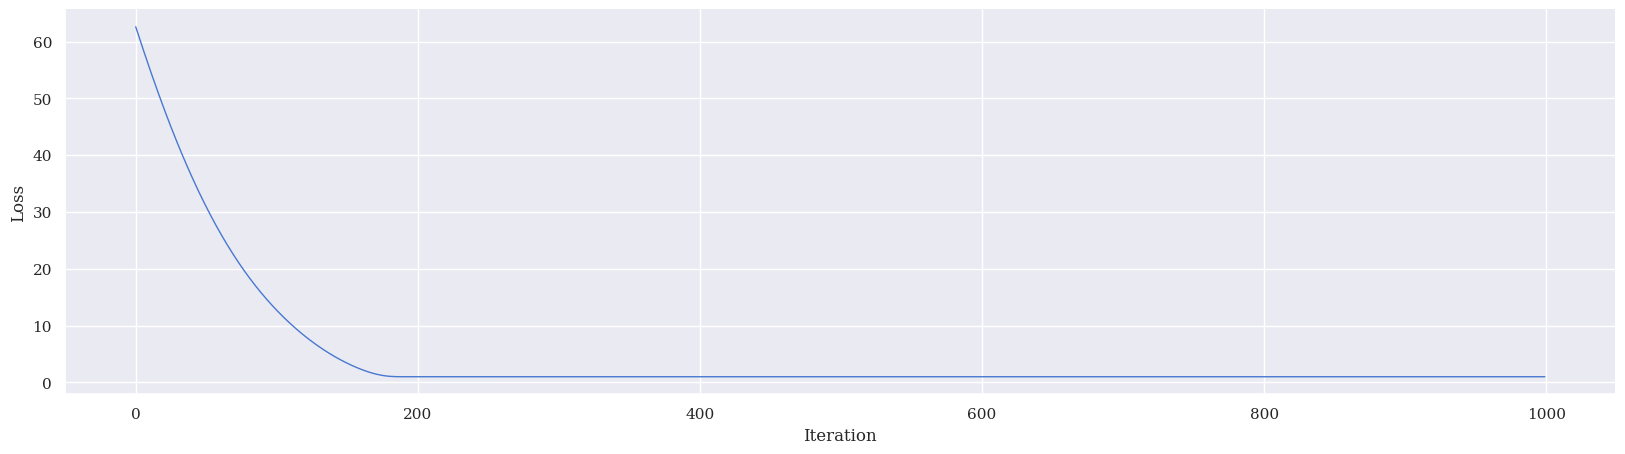

In [15]:
def train():
    t = np.arange(0, 3, 0.3)
    hidden_sizes = np.array([10, 10, 10, 10, 10, 10, 10, 10, 10])
    activation_fns = [sigmoid] * (len(hidden_sizes)) + [lambda x: x]
    nn_weights_1 = init_weights(1, hidden_sizes, 1)
    nn_weights_2 = init_weights(1, hidden_sizes, 1)
    adam(
        t,
        [nn_weights_1, nn_weights_2],
        activation_fns,
        trial_solution,
        derivative,
        num_iters=1000,
        step_size=0.001,
        threshold=0.0001,
    )

    return [nn_weights_1, nn_weights_2], activation_fns


weights_list, activation_fns = train()

Iteration:  0
 0.00025466452749217764
Iteration:  1
 0.00032535692982054435
Iteration:  2
 0.000262706030250146
Iteration:  3
 0.00025013839455198923
Iteration:  4
 0.0002812122883274277
Iteration:  5
 0.00026993904475638053
Iteration:  6
 0.00024493677007297285
Iteration:  7
 0.00024719665015044486
Iteration:  8
 0.00026287017181759803
Iteration:  9
 0.00026127472650348485
Iteration:  10
 0.00024735536848976083
Iteration:  11
 0.0002419888783823544
Iteration:  12
 0.0002501237851839424
Iteration:  13
 0.00025529218763532894
Iteration:  14
 0.000249885930162713
Iteration:  15
 0.00024251263465102668
Iteration:  16
 0.00024320796343560192
Iteration:  17
 0.00024858106496515337
Iteration:  18
 0.000249213090144478
Iteration:  19
 0.00024456143468600515
Iteration:  20
 0.0002416404963675131
Iteration:  21
 0.00024389278269282852
Iteration:  22
 0.0002464852877242543
Iteration:  23
 0.0002451210510111849
Iteration:  24
 0.00024216443970319964
Iteration:  25
 0.00024197054909025454
Iteratio

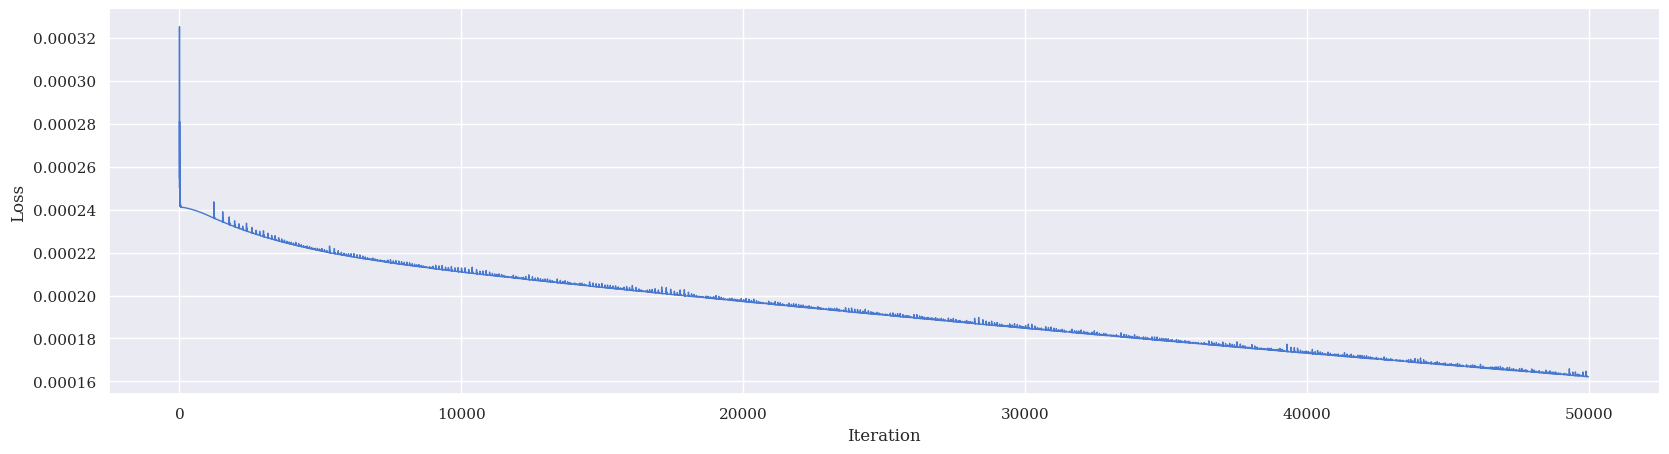

In [33]:
def continue_train(weights_list, activation_fns):
    t = np.arange(0, 3, 0.3)
    adam(
        t,
        weights_list,
        activation_fns,
        trial_solution,
        derivative,
        num_iters=50000,
        step_size=0.000001,
        threshold=0.0001,
    )

    return weights_list, activation_fns


weights_list, activation_fns = continue_train(weights_list, activation_fns)

### Evaluating Results

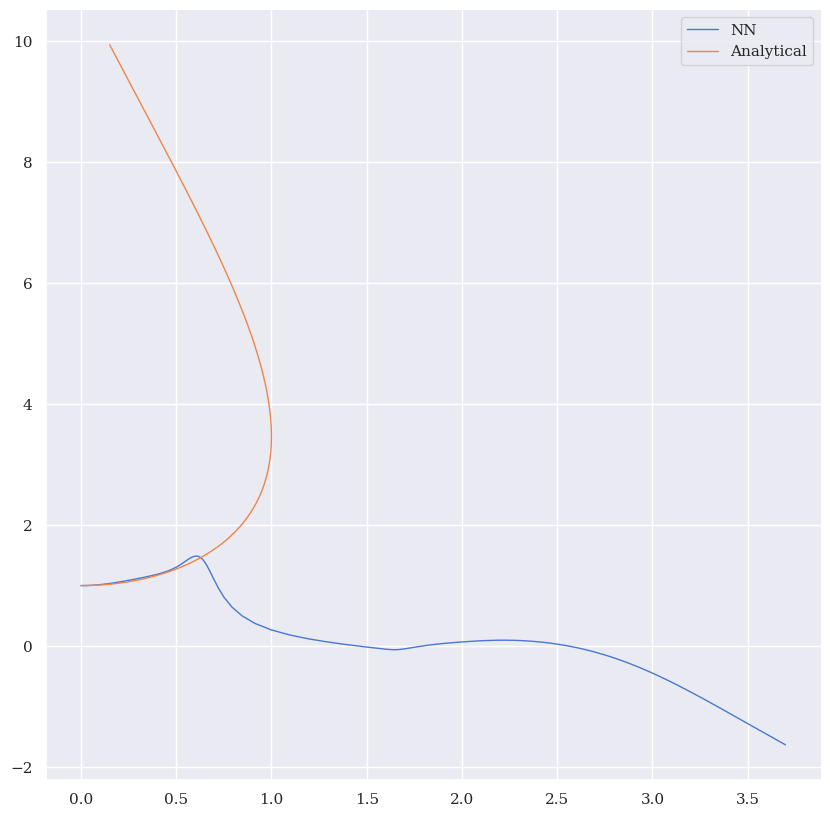

In [34]:
t = np.arange(0, 3, 0.01)
res = trial_solution(t, weights_list, activation_fns)
an_sol = analytical_solution(t)

plot_system_ode(res, an_sol)

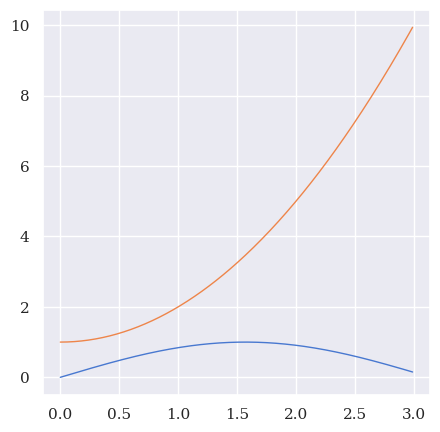

In [35]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(t, an_sol[0], lw=1)
ax.plot(t, an_sol[1], lw=1)

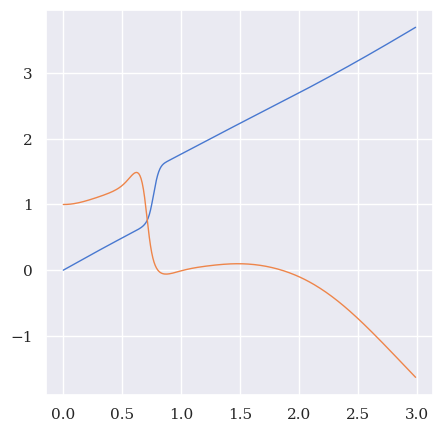

In [36]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()
ax.plot(t, res[0], lw=1)
ax.plot(t, res[1], lw=1)

In [22]:
print_error(res, an_sol)

[[ 0.00000000e+00 -5.25536719e-04 -1.31553391e-03 -2.38149372e-03
  -3.72145547e-03 -5.32537687e-03 -7.19340919e-03 -9.36652883e-03
  -1.19651379e-02 -1.52280530e-02 -1.95439323e-02 -2.54714464e-02
  -3.37535746e-02 -4.53429729e-02 -6.14643270e-02 -8.37391433e-02
  -1.14381952e-01 -1.56440840e-01 -2.14002046e-01 -2.92219465e-01
  -3.96989176e-01 -5.34104484e-01 -7.07843546e-01 -9.19182182e-01
  -1.16413472e+00 -1.43293543e+00 -1.71065814e+00 -1.97935162e+00
  -2.22107869e+00 -2.42083247e+00]
 [ 0.00000000e+00 -4.76790557e-04 -1.32582767e-03 -2.36256691e-03
  -3.48753935e-03 -4.68809668e-03 -6.03857246e-03 -7.70036404e-03
  -9.92499236e-03 -1.30653546e-02 -1.76031544e-02 -2.42037787e-02
  -3.38134546e-02 -4.78169143e-02 -6.82762292e-02 -9.82713575e-02
  -1.42357063e-01 -2.07132776e-01 -3.01880163e-01 -4.39140397e-01
  -6.34962754e-01 -9.08365523e-01 -1.27939322e+00 -1.76525386e+00
  -2.37470731e+00 -3.10226521e+00 -3.92516466e+00 -4.80591929e+00
  -5.70056956e+00 -6.56914434e+00]]
